In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('housePrice.xlsx', index_col=0, header=0)
data.drop(['建筑结构', '小区', '地址', '经度', '纬度'], axis=1, inplace=True)
data.head()

,户型-房间,户型-厅,户型-厨房,户型-卫生,建筑面积,朝向,装修,电梯,总楼层,所处层数,建筑类型,建筑时间,价格（万）
序号,,,,,,,,,,,,,
1,3,2,1,2,152.32,4,2,1,9,0.33,1,2010,590.0
2,3,2,0,1,85.87,7,2,1,21,0.66,1,2014,375.0
3,3,2,1,2,96.19,9,0,0,6,0.33,1,2013,410.0
4,3,1,1,1,88.48,7,2,1,12,1.00,1,2009,388.0
5,2,2,1,1,89.88,7,1,1,18,0.33,1,2008,353.0


In [52]:
X = data.iloc[:, [4]].values.astype(float) # 建筑面积
Y = data.iloc[:,-1].values.astype(float) # 价格

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
print(linreg.intercept_, linreg.coef_)

65.81768760780852 [3.45635946]


In [44]:
from sklearn import metrics
Y_pred = linreg.predict(X)
Y_test_pred = linreg.predict(X_test)
print(Y_pred)
print(Y_test_pred)

[592.29036013 362.6152742  398.2849038  371.63637238 376.47527562
 450.06116846 410.27847111 348.30594604 363.44480047 377.37392908
 321.58828744 507.71324421 534.36177563 507.71324421 489.84386582
 407.02949322 373.19173414 349.93043499 283.0153159  459.84266573
 499.27972714 379.62056273 291.3105786  377.78869221 390.47353142
 500.93877967 426.69617853 499.27972714 390.75004018 383.80275767
 500.38576216 380.34639821 685.71575626 430.35991956 410.17478033
 373.19173414 374.29776916 546.80466967 384.07926643 452.86081963
 272.1623472  377.47761986 283.56833341 539.51175122 538.57853416
 601.17320393 499.27972714 655.12697506 614.51475144 504.08406678
 275.61870666 321.41546947 657.65011746 457.18126895 948.08800265
 532.66815949 500.93877967 533.98157609 426.69617853 378.5490913
 374.29776916 345.92105802 453.10276479 938.68670493 378.5490913
 541.20536735 272.23147439 272.1623472  286.47167536 432.19179007
 376.26789405 432.60655321 367.00485071 471.52516069 375.9913853
 387.22455353

In [45]:
err = metrics.mean_squared_error(Y, Y_pred)
test_err = metrics.mean_squared_error(Y_test, Y_test_pred)
print('模型在全体和在测试集上的均方误差分别为: {:.2f}, {:.2f}'.format(err, test_err))

模型在全体和在测试集上的均方误差分别为: 4096.84, 4777.29


In [46]:
predict_score = linreg.score(X_test, Y_test)
print('决定系数为: {:.2f} '.format(predict_score))

决定系数为: 0.72 


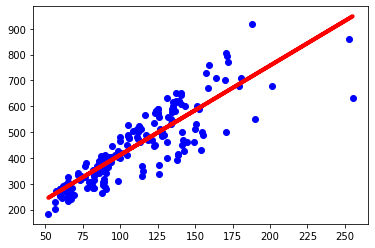

In [48]:
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red', linewidth=4)
plt.show()

In [65]:
print(f"假设希望购买150平方米的房屋，预测价格为{linreg.predict([[150]])[0]:.2f}万元")

假设希望购买150平方米的房屋，预测价格为584.27万元
